In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

def image_calibration(origin_folder_path, calibration_path, write_folder, ymin=0, ymax=799, xmin=0, xmax=1279):

    frame_paths = sorted(glob.glob(os.path.join(origin_folder_path, "*.tif")))
    calibration = cv.imread(calibration_path, cv.IMREAD_UNCHANGED).astype(np.float32)

    # Crop the calibration frame to the region of interest

    for i in range(len(frame_paths)):
        if frame_paths[i] is None:
            print(f"image {i} not found")

    cal_frame = calibration[ymin:ymax+1, xmin:xmax+1]

    for i, path in enumerate(frame_paths):
        # if i>50:
        #     break
        frame = cv.imread(path, cv.IMREAD_UNCHANGED).astype(np.float32)
        #cv sees a 12-bit image and scales it to 16-bit when we read it, giving us values > 4096
        #the calibration frame gets saved as a 16-bit image, so when cv opens it it does not scale it. Therefore we need
            #to scale it by 16
        calibrated_frame = np.clip(frame[ymin:ymax+1, xmin:xmax+1] - 16*cal_frame, 0, 65535).astype(np.uint16)
        base_name = path.split("\\")[-1].split("_")[0]
        if len(str(i)) == 1:
            write_path = write_folder + "\\" + base_name + "_calibrated_0000" + str(i) + ".tif"
        elif len(str(i)) == 2:
            write_path = write_folder + "\\" + base_name + "_calibrated_000" + str(i) + ".tif"
        elif len(str(i)) == 3:
            write_path = write_folder + "\\" + base_name + "_calibrated_00" + str(i) + ".tif"
        elif len(str(i)) == 4:
            write_path = write_folder + "\\" + base_name + "_calibrated_0" + str(i) + ".tif"
        else:
            write_path = write_folder + "\\" + base_name + "_calibrated_" + str(i) + ".tif"
        cv.imwrite(write_path, calibrated_frame)
        
        if i%20 == 0:
            print(f"Processed frame {i+1}/{len(frame_paths)}: {write_path}")
        

In [6]:
origin_folder_paths = [r"E:\Griffin\20250818\tests 1-3\test1",
                       r"E:\Griffin\20250818\tests 1-3\test2",
                       r"E:\Griffin\20250818\tests 1-3\test3",
                       r"E:\Griffin\20250818\tests 8-10\test8",
                       r"E:\Griffin\20250818\tests 8-10\test9",
                       r"E:\Griffin\20250818\tests 8-10\test10"]

calibration_paths = [r"E:\Griffin\20250818\tests 1-3\AVG_calibration.tif",
                     r"E:\Griffin\20250818\tests 1-3\AVG_calibration.tif",
                     r"E:\Griffin\20250818\tests 1-3\AVG_calibration.tif",
                     r"E:\Griffin\20250818\tests 8-10\AVG_calibration.tif",
                     r"E:\Griffin\20250818\tests 8-10\AVG_calibration.tif",
                     r"E:\Griffin\20250818\tests 8-10\AVG_calibration.tif",]

write_folders = [r"E:\Griffin\20250818\tests 1-3\test1_calibrated",
                 r"E:\Griffin\20250818\tests 1-3\test2_calibrated",
                 r"E:\Griffin\20250818\tests 1-3\test3_calibrated",
                 r"E:\Griffin\20250818\tests 8-10\test8_calibrated",
                 r"E:\Griffin\20250818\tests 8-10\test9_calibrated",
                 r"E:\Griffin\20250818\tests 8-10\test10_calibrated"]

for i in range(6):
    image_calibration(origin_folder_paths[i], calibration_paths[i], write_folders[i])

Processed frame 1/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00000.tif
Processed frame 21/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00020.tif
Processed frame 41/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00040.tif
Processed frame 61/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00060.tif
Processed frame 81/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00080.tif
Processed frame 101/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00100.tif
Processed frame 121/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00120.tif
Processed frame 141/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00140.tif
Processed frame 161/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00160.tif
Processed frame 181/42876: E:\Griffin\20250818\tests 1-3\test1_calibrated\test1_calibrated_00180.

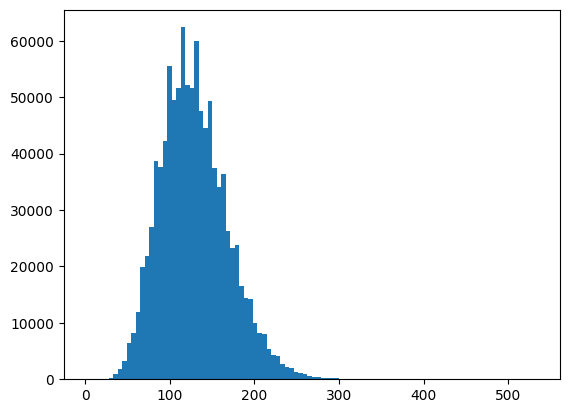

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
hmm = cv.imread(r"D:\14 July laser testing\test2\AVG_calibration.tif", cv.IMREAD_UNCHANGED).astype(np.float32)
hist = plt.hist(hmm.flatten(), bins=100)